In [54]:
import torch
import matplotlib.pyplot as plt
import warnings

# Exact diagonalization

The potential is $V(x) = V_0 \sin^2(k_1 x)$, with period $k_1 x= 2\pi n\to x = \frac{2\pi}{k_1}n$. This means the hamiltonian is:

$$H = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V_0 \sin^2(k_1 x)$$

To construct the exact diagonalization, we use the usual finite differences for the kinetic term:

$$K\psi = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi\approx -\frac{\hbar^2}{2m}\frac{\psi_{i-1}-2\psi_i+\psi_{i+1}}{h^2}$$

Where we discretized $\psi(x)\to \psi(x_i)\equiv\psi_i$ in an equispaced grid with spacing $h\equiv x_{i}-x_{i-1}$. Expressing psi as a vector such as:

$$\psi = \begin{pmatrix}\psi_1\\\psi_2\\\vdots\\\psi_N\end{pmatrix}$$

We see that the kinetic operator can be expressed as a tridiagonal matrix:

$$K = -\frac{\hbar^2}{2mh^2}(-2\delta_{i,j}+\delta_{i, j+1}+\delta_{i, j-1})=-\frac{\hbar^2}{2mh^2}\begin{pmatrix}-2&1&0&\dots&0\\1&-2&1&\dots&0\\0&1&-2&\dots&0\\\vdots&\vdots&\vdots&\ddots&1\\0&0&0&\dots&-2\end{pmatrix}$$

## Boundary conditions

If PBC, then at positions [0,-1] and [-1,0] there has to be a 1.

In [68]:
# PARAMETERS
HBAR = 1.0
MASS = 1.0
V0 = 1.0
K1 = 1.0
PBC = True

N_POINTS = 5_000
N_PERIODS_FROM_CENTRE_TO_RIGHT = 10 # number of periods from the center to the right edge
A = 2*N_PERIODS_FROM_CENTRE_TO_RIGHT-1 # number of periods in the box centered at zero
L_BOX = 2*torch.pi/K1 * A
GRID_SPACING = L_BOX / N_POINTS
# if GRID_SPACING < torch.pi/(K1):
#     warnings.warn("Aliasing may occur: N_POINTS is too small for the given K1.")

# Create a grid of points
x = torch.linspace(-L_BOX/2,L_BOX/2, N_POINTS)

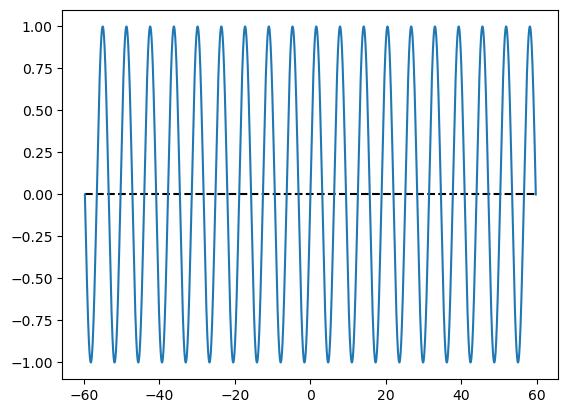

In [69]:
def V(x):
    """Potential function."""
    return V0 * torch.sin(K1 * x)

plt.hlines(0, -L_BOX/2, L_BOX/2, colors='black', linestyles='dashed')
plt.plot(x.numpy(), V(x).numpy(), label='Potential V(x)')

In [70]:
def hamiltonian_matrix(N_POINTS, GRID_SPACING, PBC):
    kin_coeff = HBAR**2 / (2 * MASS * GRID_SPACING**2)
    kin_main_diag = 2*torch.ones(N_POINTS)
    kin_off_diags = -1*torch.ones(N_POINTS-1)
    # kin_matrix = torch.zeros((N_POINTS, N_POINTS))
    kin_matrix = torch.diag(kin_main_diag)
    kin_matrix += torch.diag(kin_off_diags, diagonal=1)
    kin_matrix += torch.diag(kin_off_diags, diagonal=-1)
    if PBC:
        kin_matrix[0, -1] = 1
        kin_matrix[-1, 0] = 1
    pot_matrix = torch.zeros((N_POINTS, N_POINTS))
    for i in range(N_POINTS):
        pot_matrix[i, i] = V0 * torch.exp(-K1 * (x[i]**2))
        # pot_matrix[i, i] = 0.5*MASS* x[i]**2  # Harmonic potential
    return kin_coeff * kin_matrix + pot_matrix

In [71]:
eigenvalues, eigenstates = torch.linalg.eigh(hamiltonian_matrix(N_POINTS, GRID_SPACING, PBC))
print(eigenstates.shape)

for i in range(5):
    print(f'Eigenvalue {i}: {eigenvalues[i].item()}')

torch.Size([5000, 5000])
Eigenvalue 0: 0.0016554183093830943
Eigenvalue 1: 0.003625313052907586
Eigenvalue 2: 0.004318259656429291
Eigenvalue 3: 0.0058888657949864864
Eigenvalue 4: 0.010135873220860958


In [87]:
n_periods_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

ground_state_energy = []
first_excited_state_energy = []
second_excited_state_energy = []
third_excited_state_energy = []

for i in range(14,22):
    N_PERIODS_FROM_CENTRE_TO_RIGHT = i # number of periods from the center to the right edge
    A = 2*N_PERIODS_FROM_CENTRE_TO_RIGHT-1 # number of periods in the box centered at zero
    L_BOX = 2*torch.pi/K1 * A
    GRID_SPACING = L_BOX / N_POINTS
    x = torch.linspace(-L_BOX/2,L_BOX/2, N_POINTS)
    hamiltonian = hamiltonian_matrix(N_POINTS, GRID_SPACING, PBC)
    eigenvalues, eigenstates = torch.linalg.eigh(hamiltonian)
    ground_state_energy.append(eigenvalues[0].item()) 
    first_excited_state_energy.append(eigenvalues[1].item())
    second_excited_state_energy.append(eigenvalues[2].item())
    third_excited_state_energy.append(eigenvalues[3].item())

[]


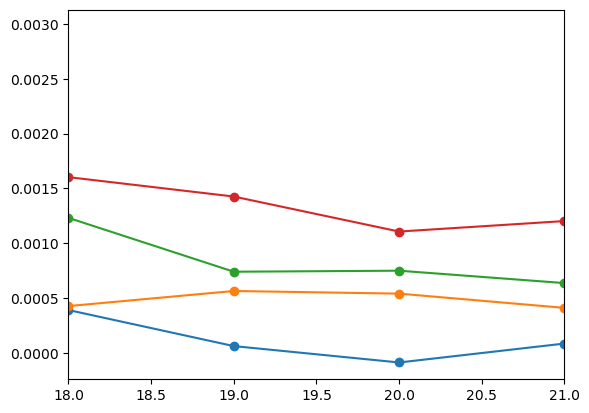

In [90]:
n_periods_range = list(range(14,22))
plt.plot(n_periods_range, ground_state_energy, marker='o', label='Ground State Energy')
plt.plot(n_periods_range, first_excited_state_energy, marker='o', label='First Excited State Energy')
plt.plot(n_periods_range, second_excited_state_energy, marker='o', label='Second Excited State Energy')
plt.plot(n_periods_range, third_excited_state_energy, marker='o', label='Third Excited State Energy')
plt.xlim(18,21)
# plt.semilogy()
print(ground_state_energy[9:12])